In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
oscars_df = pd.read_csv('oscar_movies_data.csv')

In [3]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 93 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     1532 non-null   int64  
 1   IMDBId                                         908 non-null    object 
 2   movie title                                    1532 non-null   object 
 3   language                                       1532 non-null   object 
 4   country                                        1532 non-null   object 
 5   runtime (mins)                                 1532 non-null   int64  
 6   mpaarating                                     1532 non-null   object 
 7   metacritic score                               1532 non-null   float64
 8   budget                                         1211 non-null   float64
 9   distributionCompany                            1523 

## MVP Model

In [4]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(oscars_df.select_dtypes(include=numerics).columns)

In [5]:
oscars_numeric_df = oscars_df.loc[:,numerical_vars]

In [6]:
oscars_numeric_df.corr()

,Unnamed: 0,runtime (mins),metacritic score,budget,Total_Movies_Lead_Actor_Director,Total_Movies_First_Supporting_Actor_Director,Total_Movies_Second_Supporting_Actor_Director,Buena Vista Pictures,Columbia Pictures,Focus Features,...,Tony Kushner,Valerie Curtin,William Goldman,Winston Groom,G,Not Rated,PG,PG-13,R,Unrated
Unnamed: 0,1.000000,-0.112974,-0.151401,0.146535,0.170993,0.301774,0.296890,0.090260,0.002451,-0.028815,...,-0.003440,0.104433,0.099885,-0.107712,0.082745,0.016747,0.091126,0.028380,-0.125753,-0.019296
runtime (mins),-0.112974,1.000000,-0.023589,0.249181,0.088444,-0.013948,0.026571,-0.037870,0.013802,-0.053639,...,0.266500,-0.105789,-0.238844,0.068806,-0.177472,-0.133952,-0.127174,0.040058,0.173080,-0.051979
metacritic score,-0.151401,-0.023589,1.000000,-0.186416,0.000218,-0.057804,-0.062670,-0.055294,-0.047187,0.112641,...,0.027835,-0.165807,0.068378,0.095400,0.057504,0.054021,-0.113506,-0.108521,0.146526,-0.011982
budget,0.146535,0.249181,-0.186416,1.000000,0.112670,0.116715,0.118473,0.163029,-0.012280,-0.120425,...,0.063660,-0.092502,-0.128443,0.007216,0.101507,-0.086315,0.079554,0.223022,-0.277408,NaN
Total_Movies_Lead_Actor_Director,0.170993,0.088444,0.000218,0.112670,1.000000,0.530756,0.581119,0.007054,-0.005962,0.079072,...,0.012893,-0.102551,0.012893,0.009047,-0.001908,-0.041135,0.019394,0.007696,-0.005869,-0.007916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Not Rated,0.016747,-0.133952,0.054021,-0.086315,-0.041135,-0.020223,-0.012763,NaN,NaN,NaN,...,-0.039193,-0.048387,-0.039193,-0.027496,-0.030235,1.000000,-0.083764,-0.107074,-0.177110,-0.010303
PG,0.091126,-0.127174,-0.113506,0.079554,0.019394,0.037916,0.023141,0.040442,0.164679,-0.063443,...,-0.084781,0.084317,0.374448,-0.059479,-0.079049,-0.083764,1.000000,-0.279945,-0.463056,-0.026938
PG-13,0.028380,0.040058,-0.108521,0.223022,0.007696,-0.007071,-0.007009,-0.052138,0.009606,-0.054390,...,-0.150188,-0.185419,-0.150188,0.148293,-0.101046,-0.107074,-0.279945,1.000000,-0.591915,-0.034434
R,-0.125753,0.173080,0.146526,-0.277408,-0.005869,-0.027929,-0.019332,-0.125851,-0.115591,0.111919,...,0.240772,0.143908,-0.131851,-0.092502,-0.167140,-0.177110,-0.463056,-0.591915,1.000000,-0.056957


<Figure size 864x1080 with 0 Axes>

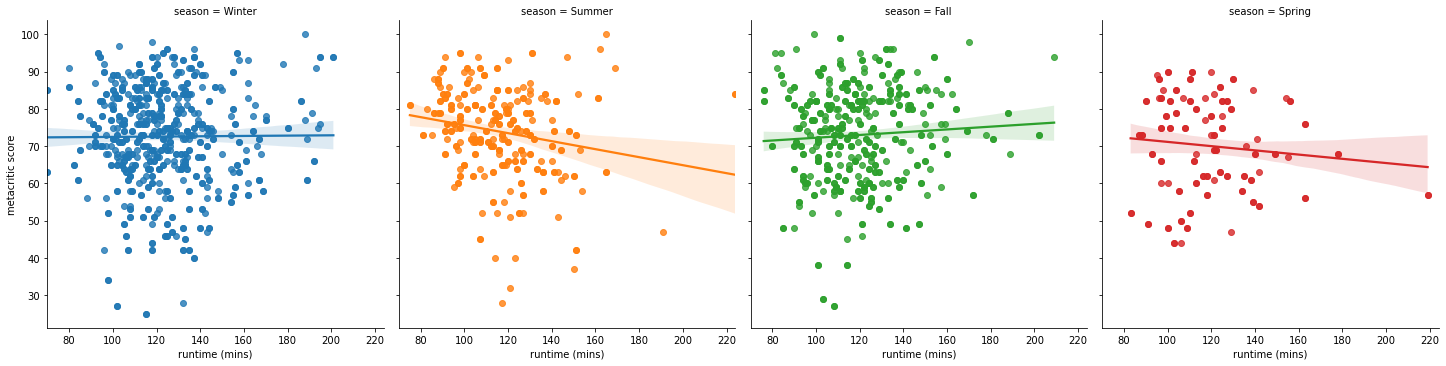

In [46]:
plt.figure(figsize=(12,15))
sns.lmplot(data=oscars_df, x='runtime (mins)', y="metacritic score", col="season", hue="season")

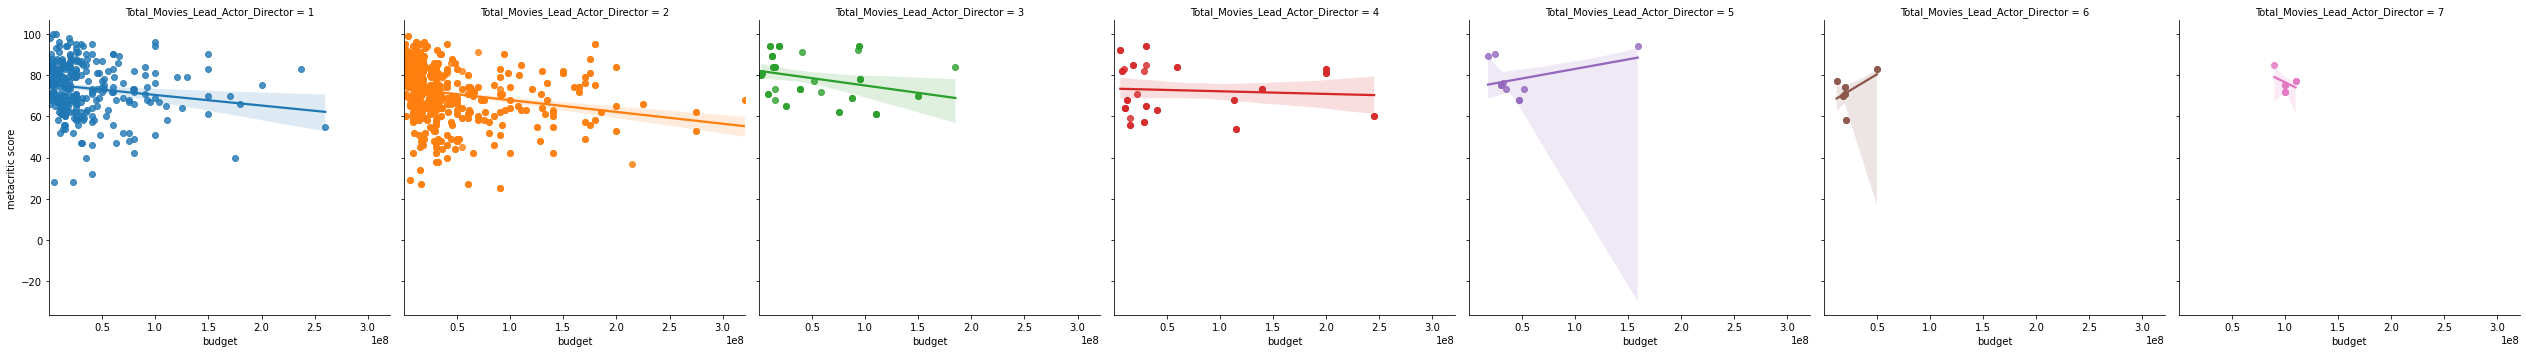

In [35]:
sns.lmplot(data=oscars_df, x="budget", y="metacritic score", col="Total_Movies_Lead_Actor_Director",hue='Total_Movies_Lead_Actor_Director')

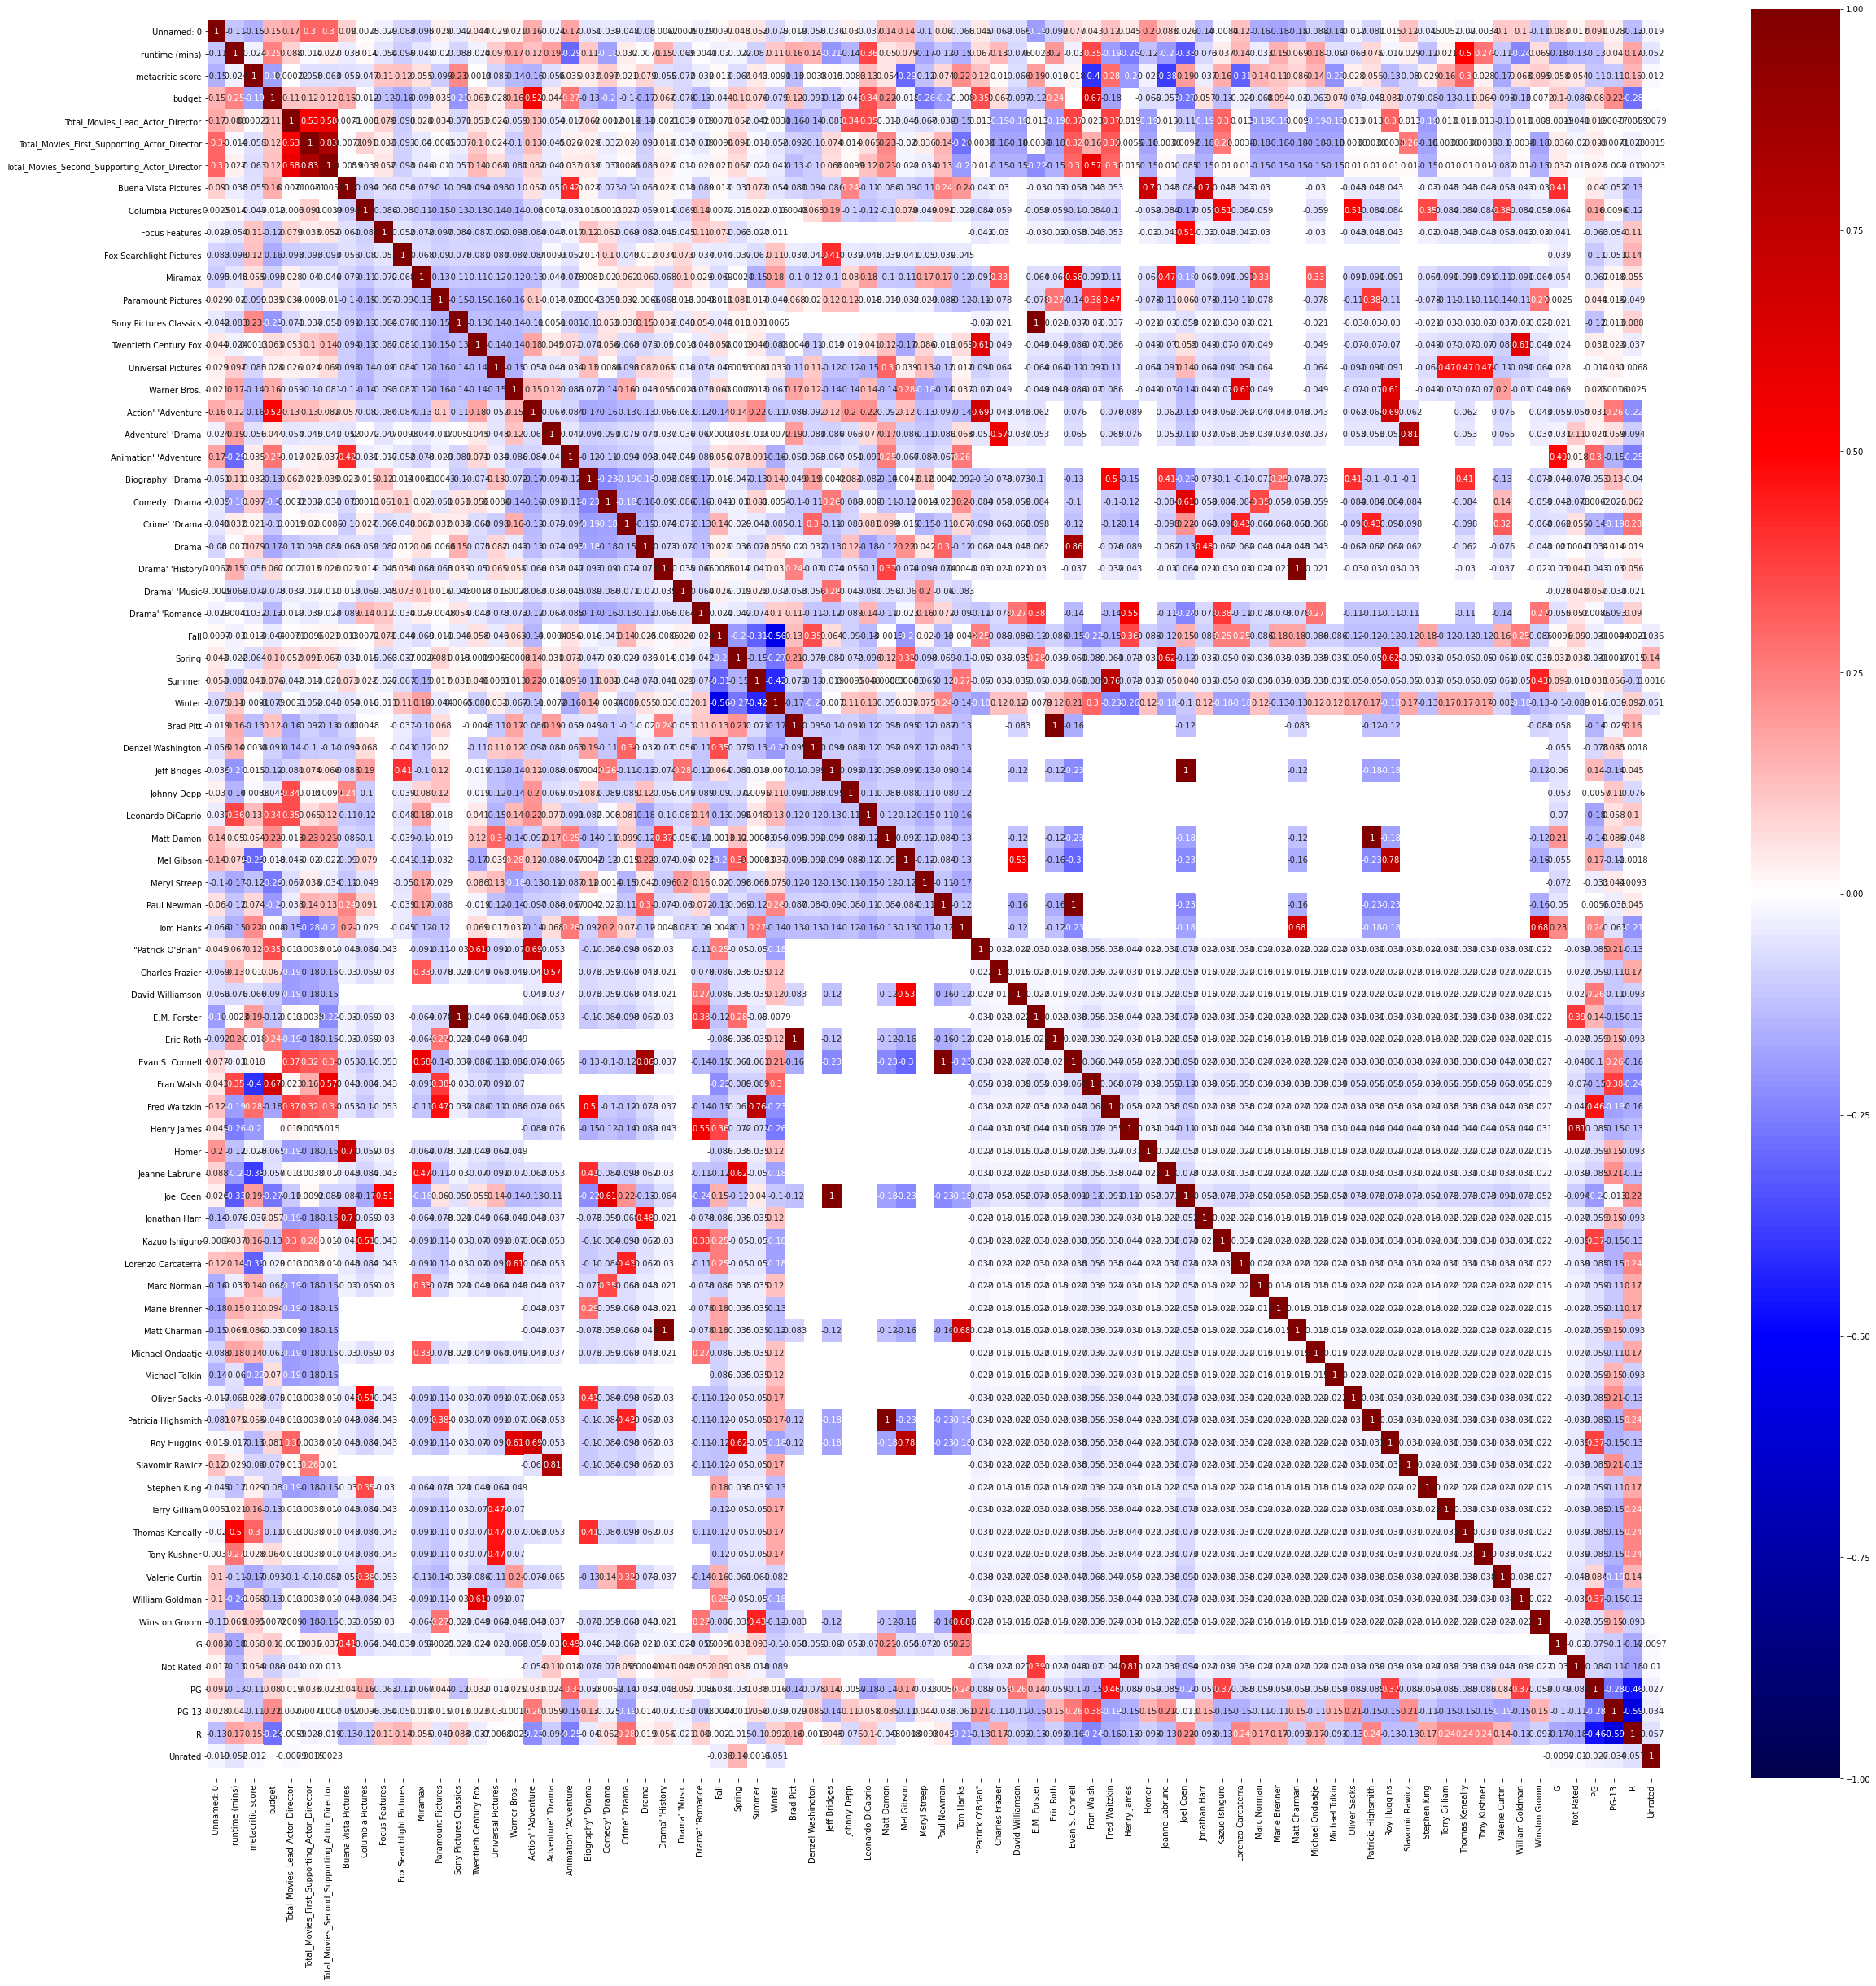

In [7]:
plt.figure(figsize=(40,40))
sns.heatmap(oscars_numeric_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(oscars_numeric_df.corr())+0.5, -0.5);

In [8]:
oscars_numeric_df['budget'].fillna(oscars_numeric_df['budget'].mean(),inplace=True)

In [9]:
oscars_numeric_df = oscars_numeric_df.fillna(0)

In [10]:
X = oscars_numeric_df.drop(labels=['metacritic score','Unnamed: 0'],axis=1)
y = oscars_numeric_df['metacritic score']

In [11]:
oscars_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 78 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     1532 non-null   int64  
 1   runtime (mins)                                 1532 non-null   int64  
 2   metacritic score                               1532 non-null   float64
 3   budget                                         1532 non-null   float64
 4   Total_Movies_Lead_Actor_Director               1532 non-null   int64  
 5   Total_Movies_First_Supporting_Actor_Director   1532 non-null   int64  
 6   Total_Movies_Second_Supporting_Actor_Director  1532 non-null   float64
 7   Buena Vista Pictures                           1532 non-null   float64
 8   Columbia Pictures                              1532 non-null   float64
 9   Focus Features                                 1532 

In [12]:
mvp_model = sm.OLS(y,X,missing='drop')
mvp_fit = mvp_model.fit()
mvp_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     4.534
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           7.59e-31
Time:                        16:25:13   Log-Likelihood:                -5929.2
No. Observations:                1532   AIC:                         1.201e+04
Df Residuals:                    1456   BIC:                         1.242e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
runtime (mins)                                    0.0440      0.017      2.571      0.010       0.010       0.078
budget                                        -2.967e-08   9.19e-09     -3.229      0.001   -4.77e-08   -1.16e-08
Total_Movies_Lead_Actor_Director                  1.1336      0.504      2.251      0.025       0.146       2.121
Total_Movies_First_Supporting_Actor_Director     -0.8580      1.035     -0.829      0.407      -2.889       1.173
Total_Movies_Second_Supporting_Actor_Director    -1.0146      1.097     -0.925      0.355      -3.167       1.138
Buena Vista Pictures                             -7.0846      1.877     -3.774      0.000     -10.767      -3.402
Columbia Pictures                                -2.7852      1.334     -2.087      0.037      -5.403      -0.168
Focus Features                                    2.4918      1.843      1.352      0.176      -1.123       6.106
Fox Searchlight Pictures                          3.9520      1.956      2.021      0.043       0.116       7.788
Miramax                                           0.9775      1.567      0.624      0.533      -2.097       4.052
Paramount Pictures                               -5.1173      1.218     -4.201      0.000      -7.507      -2.728
Sony Pictures Classics                            5.4700      1.307      4.185      0.000       2.906       8.034
Twentieth Century Fox                            -1.8308      1.326     -1.381      0.168      -4.432       0.771
Universal Pictures                               -5.9268      1.288     -4.600      0.000      -8.454      -3.399
Warner Bros.                                     -5.0321      1.267     -3.972      0.000      -7.518      -2.547
Action' 'Adventure                               -1.8831      1.490     -1.263      0.207      -4.807       1.040
Adventure' 'Drama                                -3.4080      2.216     -1.538      0.124      -7.755       0.939
Animation' 'Adventure                             5.3060      1.952      2.718      0.007       1.476       9.136
Biography' 'Drama                                 1.0553      1.093      0.965      0.335      -1.089       3.200
Comedy' 'Drama                                    1.1625      1.070      1.086      0.278      -0.937       3.262
Crime' 'Drama                                    -0.7489      1.258     -0.595      0.552      -3.216       1.718
Drama                                             1.8598      1.247      1.491      0.136      -0.587       4.306
Drama' 'History                                  -4.3339      2.161     -2.005      0.045      -8.573      -0.095
Drama' 'Music                                    -4.9343      2.183     -2.260      0.024      -9.217      -0.652
Drama

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


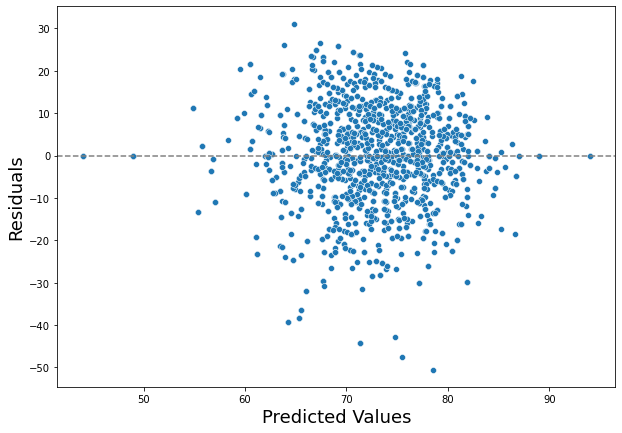

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(mvp_fit.predict(), mvp_fit.resid)   

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  

# Let SKLearn fit the best line
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [15]:
lm.coef_

array([ 4.40288476e-02, -2.96703744e-08,  1.13358880e+00, -8.57950103e-01,
       -1.01460387e+00, -7.08463669e+00, -2.78524339e+00,  2.49183442e+00,
        3.95204554e+00,  9.77543161e-01, -5.11732802e+00,  5.46995481e+00,
       -1.83081444e+00, -5.92675720e+00, -5.03213617e+00, -1.88307820e+00,
       -3.40795567e+00,  5.30595277e+00,  1.05530237e+00,  1.16251437e+00,
       -7.48853672e-01,  1.85975984e+00, -4.33387215e+00, -4.93427573e+00,
       -2.87257263e+00,  7.18900157e-02, -1.69874298e+00,  1.91253014e+00,
       -2.85677177e-01, -4.90005574e+00, -2.29550106e-01, -1.70885572e+00,
       -2.35190350e+00,  9.94297501e-01,  2.28882855e+00, -1.16063562e+01,
       -5.03891200e+00,  2.05237007e+00,  2.55006860e+00,  1.49903157e+01,
       -3.16791395e-01,  7.35381028e+00,  1.07163572e+01,  8.67960147e+00,
       -3.20303221e+00, -1.12388007e+01,  2.04511325e+01, -1.27407472e+01,
        3.66542944e+00, -2.78272029e+01,  5.57693686e+00,  1.90728745e+00,
        1.68612501e+01, -

In [16]:
lm.intercept_

74.97356865044593

In [17]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr_full = LinearRegression()
lr_full.fit(X_poly, y)
lr_full.score(X_poly, y)

0.2321768391364033

In [18]:
X.shape

(1532, 76)

In [19]:
X_poly.shape

(1532, 3003)